In [1]:
import tools
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [3]:
file = "../data/final2.csv"

In [4]:
data = tools.sorting_on_deviation(file,points=5)

In [5]:
x,y = tools.mean(data)

In [22]:
for i in range(10):
    x.pop(0)
    y.pop(0)
x.pop()
y.pop()

0.001831065

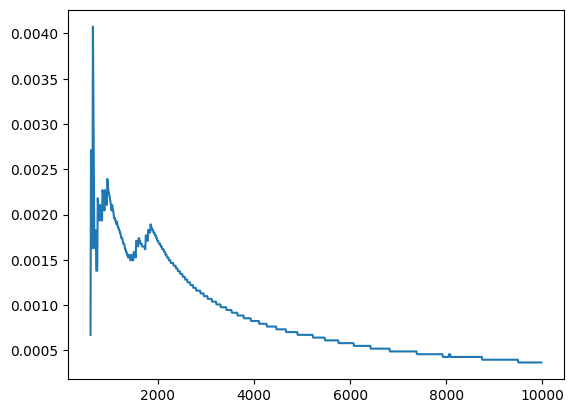

In [23]:
plt.plot(x,y)

In [25]:
popt

array([1.])

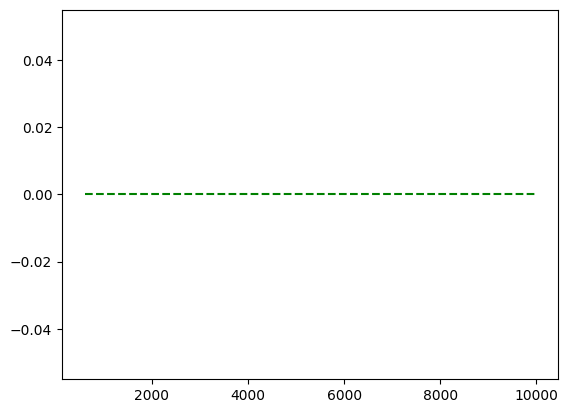

In [28]:
plt.plot(x, poisson_pmf(x, *popt), 'g--')

/home/vijay/Projects/shotnoise/env/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


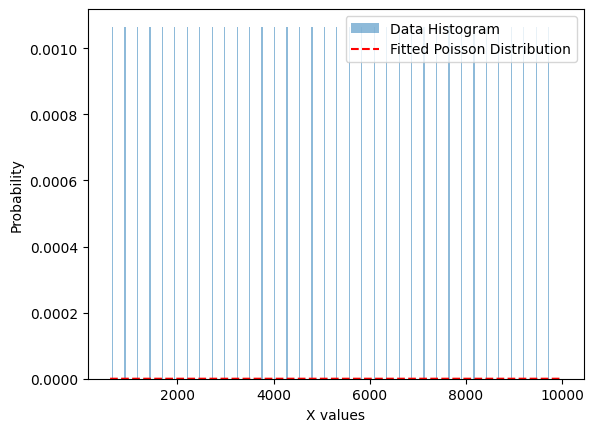

In [31]:
plt.hist(x, bins=range(int(min(x)), int(max(x)) + 1), density=True, alpha=0.5, label='Data Histogram')
plt.plot(np.arange(min(x), max(x) + 1), poisson_pmf(np.arange(min(x), max(x) + 1), *popt), 'r--', label='Fitted Poisson Distribution')
plt.xlabel('X values')
plt.ylabel('Probability')


In [33]:
file = tools.rwcafile(file)

In [35]:
data = list(file.fobject)

In [42]:
data

array([[5.00000e+02, 1.17493e-02],
       [5.00000e+02, 1.55640e-02],
       [5.00000e+02, 1.74867e-02],
       ...,
       [1.00000e+04, 3.05178e-05],
       [1.00000e+04, 0.00000e+00],
       [1.00000e+04, 6.10356e-05]])

In [48]:
x,y= np.split(data,2,axis=1)

In [58]:
filterd_data= tools.sorting_on_deviation("../data/final2.csv",50)

In [59]:
x_,y_= np.split(filterd_data,2,axis=1)

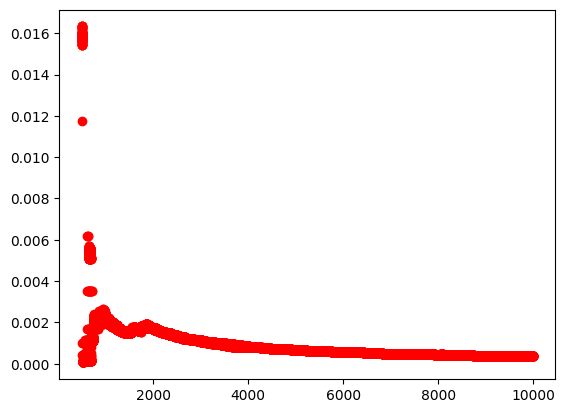

In [60]:
plt.plot(x_,y_,"ro")

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

array([[0.0160829 ],
       [0.0160218 ],
       [0.0160218 ],
       ...,
       [0.00036621],
       [0.00036621],
       [0.00036621]])

In [117]:
x = np.arange(0, 2000, 1)
   
y = poisson.pmf(x, 100,50)
   

In [128]:
def poisson_pmf(x, mean,cov):
    return poisson.rvs(x, mean,cov)

In [129]:
popt,pcov = curve_fit(poisson_pmf,x,y,p0= 4)
popt,pcov

TypeError: poisson_pmf() missing 1 required positional argument: 'cov'

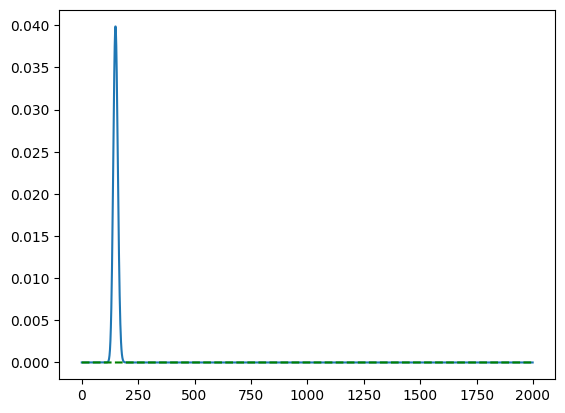

In [130]:
plt.plot(x,y)
plt.plot(x, poisson.pmf(x, *popt,*pcov), 'g--',)